In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from reservoirpy.observables import rmse

C:\Users\Peter\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(pd.__version__)

2.2.1


In [3]:

begin = 0
end = 221966

In [4]:
df = pd.read_pickle("c:/users/peter/downloads/DF_EEG_Motion_withMOUV_SubjectPatrice.pkl")

In [5]:

#dftemp = df.query('BLOCK == 6')
dftemp = df.query('BLOCK == 1 or BLOCK == 2 or BLOCK == 3 or BLOCK == 4 or BLOCK == 5 or BLOCK == 6 or BLOCK == 7 or BLOCK == 8' )

# Select the 21 specified variables
columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
                       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']
#columns_of_interest = ['RX']

dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
input_1 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(input_1.shape)  # Should print (n, 21) where n is the number of rows

#columns_of_interest = ['RX']
columns_of_interest = ['HX']
dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
output_1 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(output_1.shape)  # Should print (n, 21) where n is the number of rows

(133387, 21)
(133387, 1)


In [6]:
dftemp = df.query('BLOCK == 9')

# Select the 21 specified variables
columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
                       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']
#columns_of_interest = ['RX']

dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
input_2 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(input_2.shape)  # Should print (n, 21) where n is the number of rows

#columns_of_interest = ['RX']
columns_of_interest = ['HX']
dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
output_2 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(output_2.shape)  # Should print (n, 21) where n is the number of rows

(16573, 21)
(16573, 1)


In [7]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100,sr=0.9,lr=0.01)
readout = Ridge(ridge=1e-6)

model = reservoir >> readout


In [8]:
input_1.shape
input_1 = gaussian_filter1d(input_1, sigma=20, axis=0)
input_2 = gaussian_filter1d(input_2, sigma=20, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

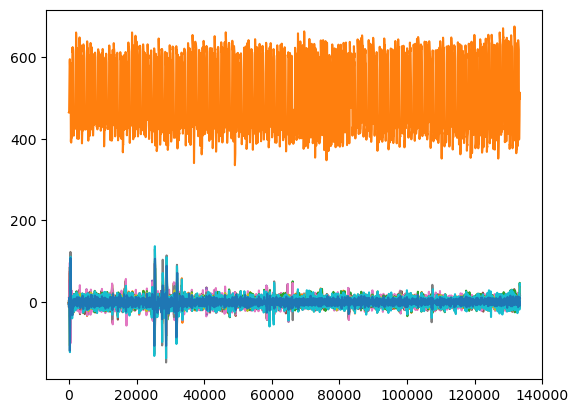

In [9]:
plt.plot(input_1)
plt.plot(output_1)
plt.show

In [10]:
U_train = input_1
Y_train = output_1

U_test = input_2
Y_test = output_2

model.fit(U_train, Y_train)


Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 903it [00:00, 8958.63it/s]                                                                            
Running Model-0: 1825it [00:00, 9067.21it/s]
Running Model-0: 2732it [00:00, 8992.38it/s]
Running Model-0: 3639it [00:00, 8995.48it/s]
Running Model-0: 4539it [00:00, 8973.76it/s]
Running Model-0: 5437it [00:00, 8862.51it/s]
Running Model-0: 6324it [00:00, 8850.04it/s]
Running Model-0: 7222it [00:00, 8870.49it/s]
Running Model-0: 8118it [00:00, 8883.81it/s]
Running Model-0: 9007it [00:01, 8878.06it/s]
Running Model-0: 9895it [00:01, 8830.37it/s]
Running Model-0: 10782it [00:01, 8834.06it/s]
Running Model-0: 11683it [00:01, 8875.39it/s]
Running Model-0: 12598it [00:01, 8935.22it/s]
Running Model-0: 13492it [00:01, 8893.07it/s]
Running Model-0: 14382it [00:01, 8743.51it/s]
Running Model-0: 15270it [00:01, 8769.31it/s]
Running Model-0: 16159it [00:01, 8

Fitting node Ridge-0...


'Model-0': Model('Reservoir-0', 'Ridge-0')

In [11]:
readout

'Ridge-0': Ridge(ridge=1e-06, input_bias=True, in=100, out=1)

In [12]:

Y_pred = model.run(U_test)

Running Model-0: 16573it [00:01, 8464.54it/s]                                                                          


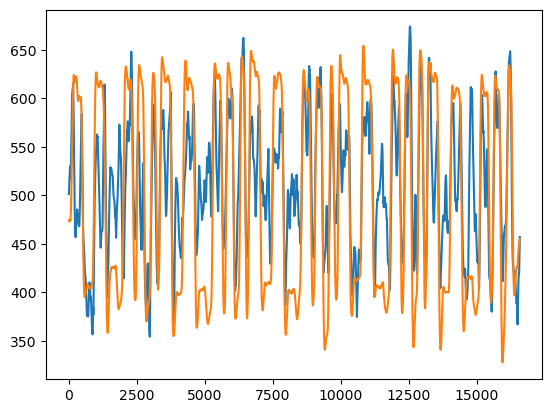

In [13]:
plt.plot(Y_pred)
plt.plot(Y_test)

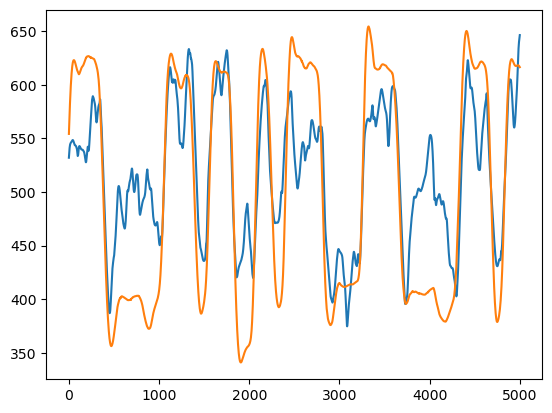

In [14]:
plt.plot(Y_pred[7500:12500])
plt.plot(Y_test[7500:12500])
plt.show()

72.42946302747065


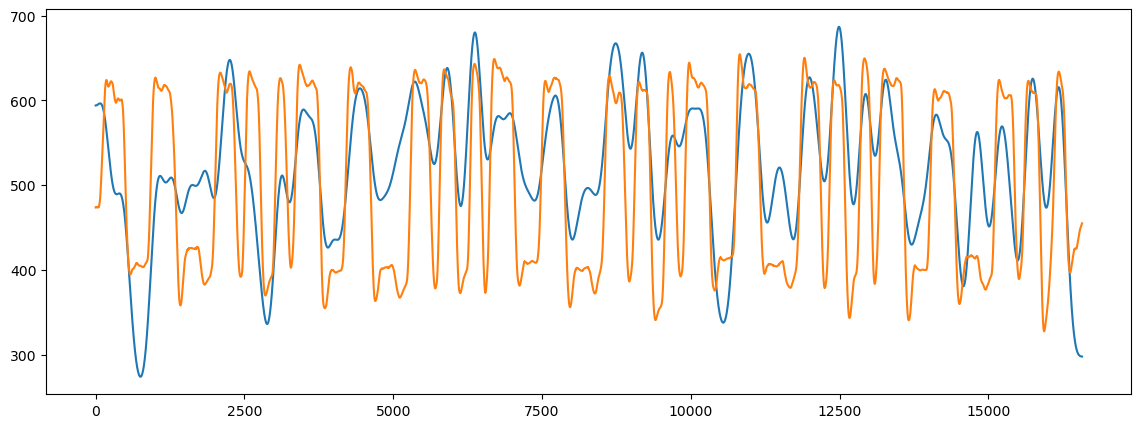

In [15]:
sigma=100
fig,ax = plt.subplots(figsize=(14,5))
plt.plot(   gaussian_filter(Y_pred[:,0], sigma=sigma)*2.2-600)
plt.plot(Y_test)
print(rmse(Y_pred, Y_test))
plt.show()

In [16]:
Y_pred.shape

(16573, 1)

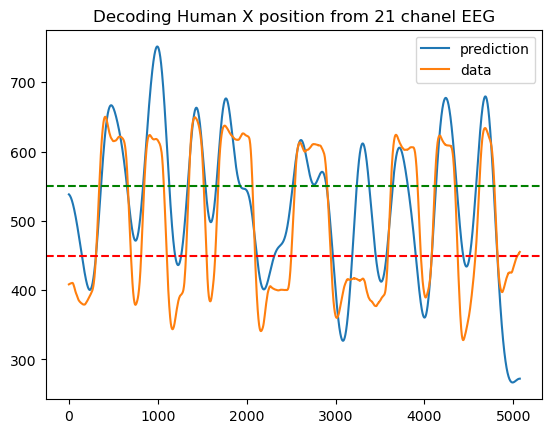

In [17]:
sigma = 80 # Standard deviation for the Gaussian kernel
smoothed_data = gaussian_filter(Y_pred[:,0], sigma=sigma)
plt.plot((smoothed_data[11500:20000]*2.5)-750,label='prediction')
#smoothed_data = gaussian_filter(Y_pred[:,1], sigma=sigma)
#plt.plot(smoothed_data[5000:10000])
plt.plot(Y_test[11500:20000],label='data')
plt.axhline(y=550, color='g', linestyle='--')  # y is the constant value for the line
plt.axhline(y=450, color='r', linestyle='--')  # y is the constant value for the line
plt.title("Decoding Human X position from 21 chanel EEG")
plt.legend()
plt.show()
a=(smoothed_data[5000:10000]*2.1)-550
b=Y_test[5000:10000]


In [18]:
a.shape

(5000,)

In [19]:
b.shape

(5000, 1)

In [20]:
print(rmse(Y_pred[5000:10000,0],Y_test[5000:10000,0]))

72.89223013030086


In [21]:
import scipy.stats as stats
stats.pearsonr(Y_pred[5000:10000,0],Y_test[5000:10000,0])

PearsonRResult(statistic=0.7888563192891593, pvalue=0.0)

In [22]:
stats.pearsonr(Y_pred[5000:10000,0],Y_test[5000:10000,0])

PearsonRResult(statistic=0.7888563192891593, pvalue=0.0)

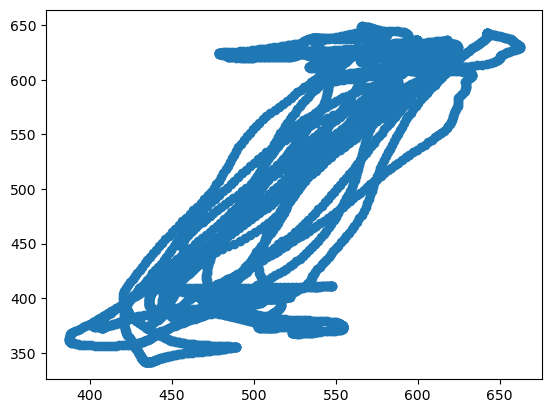

In [23]:
plt.scatter(Y_pred[5000:10000,0],Y_test[5000:10000,0])
plt.show()

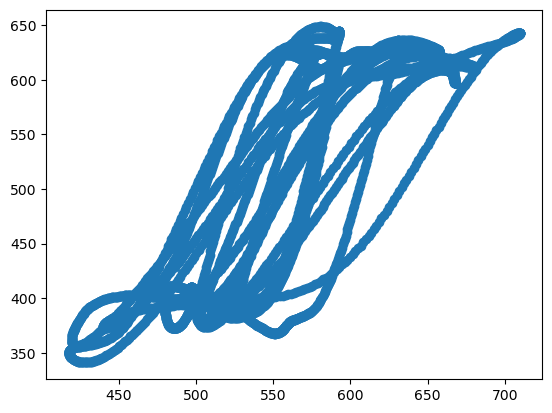

In [24]:
plt.scatter(a,b[:,0])
plt.show()